In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pathlib
pathlib.Path().absolute().stem

'Electrophysiology — копия'

In [3]:
str(pathlib.Path().absolute()).split()

['C:\\Users\\Admin\\Desktop\\Внесин',
 'передача\\Electrophysiology',
 '—',
 'копия']

In [4]:
if os.path.exists('common_res'):
    pass
else:
    os.mkdir('common_res')

In [5]:
colors = {
    'CTRL': (0, 30, 'green'),
    'GABA1': (54, 72, 'blue'),
    'GABA5': (100, 118, 'navy'),
    'PTX': (162, 198, 'red')
}

In [6]:
ctrl4m = ['Cell 1 ctrl 4m', 'Cell 2 ctrl 4m', 'Cell 3 ctrl 4m', 'Cell 4 ctrl 4m']
ctrl8m = ['Cell 1 ctrl 8m', 'Cell 2 ctrl 8m', 'Cell 3 ctrl 8m', 'Cell 4 ctrl 8m']
ad4m = ['Cell 1 ad 4m', 'Cell 2 ad 4m', 'Cell 3 ad 4m', 'Cell 4 ad 4m', 'Cell 5 ad 4m', 'Cell 6 ad 4m', 'Cell 7 ad 4m']
ad8m = ['Cell 1 ad 8m', 'Cell 4 ad 8m', 'Cell 6 ad 8m']

In [7]:
files = [ctrl4m, ctrl8m, ad4m, ad8m]

Electric cell parameters

In [16]:
def sweep_seria_correspondence(x):
    for k in colors.keys():
        if colors[k][0] <= x <= colors[k][1]:
            return k

In [30]:
def read_electric_cell_parameters():
    electric_param = {}
    r_s = {}
    r_in = {}
    for f in files:
        for item in f:
            electric_param[item] = pd.read_csv(f'C:\\Users\\Admin\\Desktop\\Внесин передача\\project_sipscs\\reports\\recordings\\{item}\electric_cell_param.csv')
            r_s[item] = np.array(electric_param[item]['R_s, Mohm'])
            r_in[item] = np.array(electric_param[item]['R_in, Mohm'])
            
    dict_df_r_s = {}
    for k in r_s.keys():
        dict_df_r_s[k] = pd.DataFrame.from_dict(r_s[k])
        
    dict_df_r_in = {}
    for k in r_in.keys():
        dict_df_r_in[k] = pd.DataFrame.from_dict(r_in[k])

    for k, v in dict_df_r_s.items():
        v['sweep_number'] = [i for i in range(len(r_s[k]))]
        v['series'] = v.sweep_number.apply(sweep_seria_correspondence)
    
    for k, v in dict_df_r_in.items():
        v['sweep_number'] = [i for i in range(len(r_in[k]))]
        v['series'] = v.sweep_number.apply(sweep_seria_correspondence)
    
    return dict_df_r_s, dict_df_r_in   

In [31]:
dict_df_r_s, dict_df_r_in = read_electric_cell_parameters()

In [27]:
dict_df_r_s['Cell 1 ctrl 4m']

,0,sweep_number,series
0,35.523659,0,CTRL
1,34.945906,1,CTRL
2,36.188645,2,CTRL
3,36.775904,3,CTRL
4,36.299189,4,CTRL
...,...,...,...
175,97.530950,175,PTX
176,104.127524,176,PTX
177,93.135744,177,PTX
178,109.012602,178,PTX


In [48]:
def common_statistic(dict_df_r_s):
    r_s_mean = {}
    for k in dict_df_r_s.keys():
        r_s_mean_temp = []
        for c in colors.keys():
            r_s_mean_temp.append(dict_df_r_s[k].loc[dict_df_r_s[k]['series'] == c].describe()[0][1])
        r_s_mean[k] = r_s_mean_temp
    return r_s_mean

In [54]:
r_s_common_stat = common_statistic(dict_df_r_s)

In [105]:
def create_table_for_boxplot(r_s_common_stat, colors, value_name):
    r_s_common_stats_res_df = pd.DataFrame(columns=['filename', 'mice_type', 'mice_age'] + list(colors.keys()))
    for i, (key, val) in enumerate(r_s_common_stat.items()):
        mice_type = key.split()[2].upper()
        mice_age = key.split()[3]
        r_s_common_stats_res_df.loc[i] = [key, mice_type, mice_age] + val
    r_s_final = r_s_common_stats_res_df.melt(id_vars=['filename', 'mice_type', 'mice_age'], 
                            value_vars=list(colors.keys()),
                            var_name='series',
                            value_name=value_name)
    return r_s_final

In [106]:
r_s_final = create_table_for_boxplot(r_s_common_stat, colors, 'R_s')

In [86]:
def create_box_plot_with_hue(data, x,  y, hue):
    plt.figure(figsize = (10, 10))
    ax = sns.boxplot(data=data, x=x, y=y, hue=hue, linewidth = 1.3, showfliers=False)
    ax.set_xlabel('series', fontsize=18)
    ax.set_ylabel(y, fontsize=18);
    plt.xticks(fontsize=12, rotation=0)
    plt.yticks(fontsize=12, rotation=0)
    plt.legend(fontsize=18)
    return plt

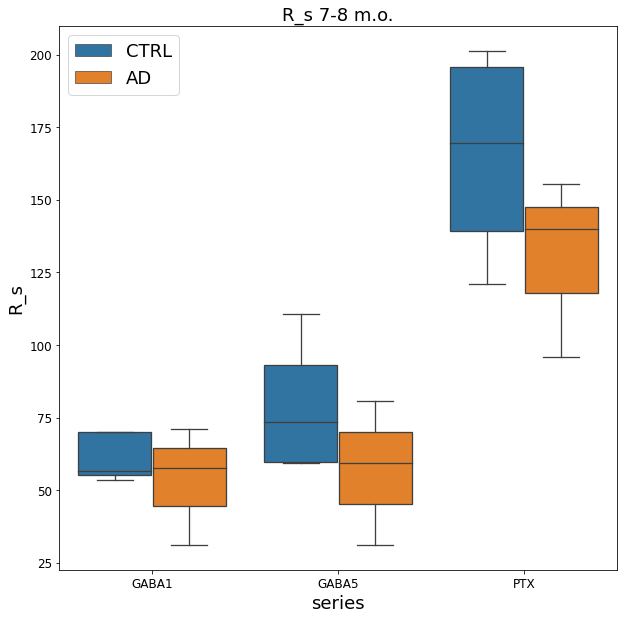

In [111]:
create_box_plot_with_hue(r_s_final[r_s_final.mice_age == '8m'].loc[r_s_final[r_s_final.mice_age == '8m']['series'] != 'CTRL']
                         , 'series', "R_s", 'mice_type')
plt.title('R_s 7-8 m.o.', fontsize=18)
plt.show()

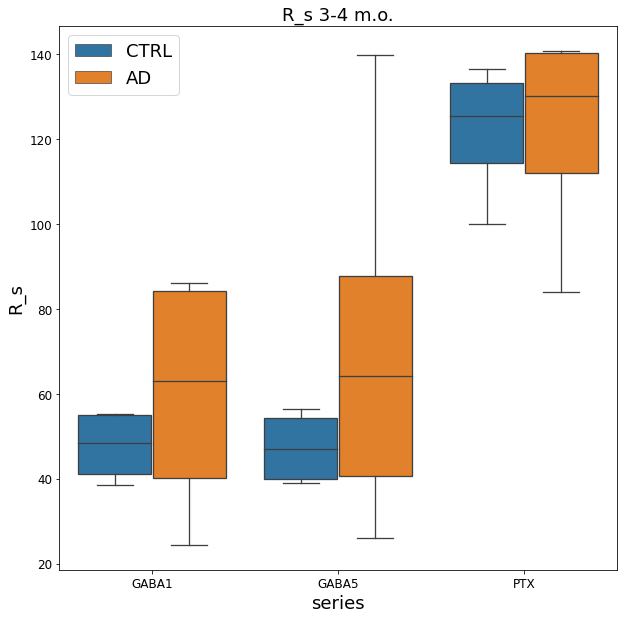

In [112]:
create_box_plot_with_hue(r_s_final[r_s_final.mice_age == '4m'].loc[r_s_final[r_s_final.mice_age == '4m']['series'] != 'CTRL']
                         , 'series', "R_s", 'mice_type')
plt.title('R_s 3-4 m.o.', fontsize=18)
plt.show()

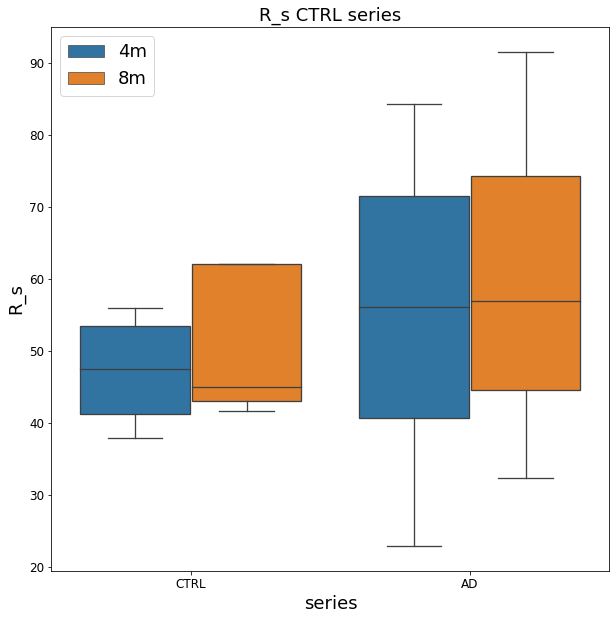

In [110]:
create_box_plot_with_hue(r_s_final.loc[r_s_final['series'] == 'CTRL']
                         ,'mice_type', "R_s", 'mice_age')
plt.title('R_s CTRL series', fontsize=18)
plt.show()

In [102]:
r_in_common_stat = common_statistic(dict_df_r_in)

In [107]:
r_in_final = create_table_for_boxplot(r_in_common_stat, colors, 'R_in')

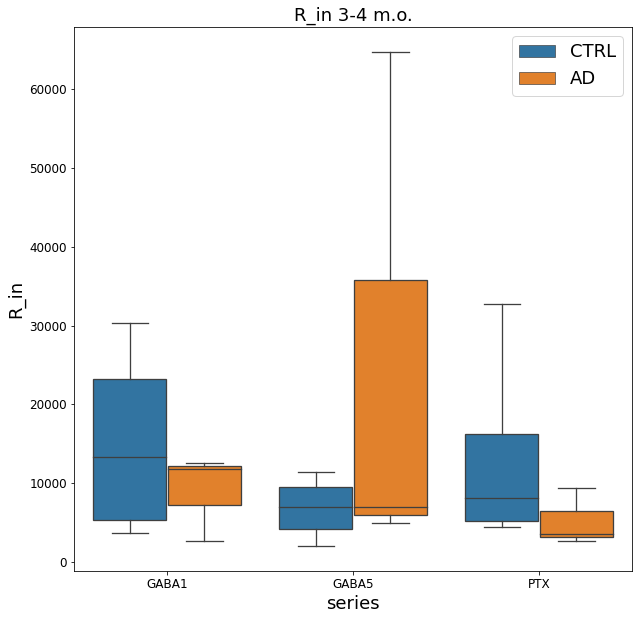

In [108]:
create_box_plot_with_hue(r_in_final[r_in_final.mice_age == '8m'].loc[r_in_final[r_s_final.mice_age == '8m']['series'] != 'CTRL']
                         , 'series', "R_in", 'mice_type')
plt.title('R_in 7-8 m.o.', fontsize=18)
plt.show()

Baseline parameters

Holding current

In [115]:
baseline_param = {}
I_hold = {}
I_hold_noise = {}
for f in files:
    for item in f:
        baseline_param[item] = pd.read_csv(f'C:\\Users\\Admin\\Desktop\\Внесин передача\\project_sipscs\\reports\\{item}\_baseline_param.csv')
        I_hold[item] = np.array(baseline_param[item]['Ihold, pA'])
        I_hold_noise[item] = np.array(baseline_param[item]['Inoise, pA'])

Tonic current

In [116]:
tonic_cur = {}
for f in files:
    for item in f:
        tonic_cur[item] = pd.read_csv(f'C:\\Users\\Admin\\Desktop\\Внесин передача\\project_sipscs\\reports\\{item}\_tonic_cur.csv')

In [138]:
dict_df_tonic_cur = {}
for k in tonic_cur.keys():
    dict_df_tonic_cur[k] = list(tonic_cur[k]['Iton, pA'])

In [142]:
tonic_cur_common_stats_res_df = pd.DataFrame(columns=['filename', 'mice_type', 'mice_age'] + list(colors.keys())[1:])
for i, (key, val) in enumerate(dict_df_tonic_cur.items()):
    mice_type = key.split()[2].upper()
    mice_age = key.split()[3]
    tonic_cur_common_stats_res_df.loc[i] = [key, mice_type, mice_age] + val

    
tonic_cur_final = tonic_cur_common_stats_res_df.melt(id_vars=['filename', 'mice_type', 'mice_age'], 
                            value_vars=list(colors.keys())[1:],
                            var_name='series',
                            value_name='Iton, pA')

Event parameters

In [173]:
event_param = {}
for f in files:
    for item in f:
        event_param[item] = pd.read_csv(f'C:\\Users\\Admin\\Desktop\\Внесин передача\\project_sipscs\\reports\\{item}\event_param.csv')

In [182]:
def event_param_processing(column, event_param):
    amplitudes = {}
    for k in event_param.keys():
        ampl_temp = []
        for c in list(colors.keys())[:3]:
            ampl_temp.append(np.array(event_param[k].loc[event_param[k]['series'] == c][column]).mean())
        amplitudes[k] = ampl_temp
    return amplitudes

In [183]:
amplitudes = event_param_processing('amplitudes', event_param)

C:\Users\Admin\AppData\Local\Temp\ipykernel_332\1239231801.py:6: RuntimeWarning: Mean of empty slice.
  ampl_temp.append(np.array(event_param[k].loc[event_param[k]['series'] == c][column]).mean())


In [186]:
tau_decay = event_param_processing('tau_decay', event_param)

C:\Users\Admin\AppData\Local\Temp\ipykernel_332\1239231801.py:6: RuntimeWarning: Mean of empty slice.
  ampl_temp.append(np.array(event_param[k].loc[event_param[k]['series'] == c][column]).mean())
C:\Users\Admin\miniconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [188]:
rise_rate_10_90   = event_param_processing('rise_rate_10_90', event_param)

C:\Users\Admin\AppData\Local\Temp\ipykernel_332\1239231801.py:6: RuntimeWarning: Mean of empty slice.
  ampl_temp.append(np.array(event_param[k].loc[event_param[k]['series'] == c][column]).mean())


In [223]:
def create_table_for_boxplot_event_params(r_s_common_stat, colors, value_name):
    r_s_common_stats_res_df = pd.DataFrame(columns=['filename', 'mice_type', 'mice_age'] + list(colors.keys())[:3])
    for i, (key, val) in enumerate(r_s_common_stat.items()):
        mice_type = key.split()[2].upper()
        mice_age = key.split()[3]
        r_s_common_stats_res_df.loc[i] = [key, mice_type, mice_age] + val
    r_s_final = r_s_common_stats_res_df.melt(id_vars=['filename', 'mice_type', 'mice_age'], 
                            value_vars=list(colors.keys())[:3],
                            var_name='series',
                            value_name=value_name)
    return r_s_final

In [224]:
amplitudes_final = create_table_for_boxplot_event_params(amplitudes, colors, 'amplitudes, pA')

Spontaneous frequency

In [199]:
spont_freqs = {}
for f in files:
    for item in f:
        spont_freqs[item] = pd.read_csv(f'C:\\Users\\Admin\\Desktop\\Внесин передача\\project_sipscs\\reports\\{item}\spont_freqs.csv')

In [214]:
spont_freqs_mean = {}
for k in spont_freqs.keys():
    spont_freqs_mean_temp = []
    for c in list(colors.keys())[:3]:
        spont_freqs_mean_temp.append(spont_freqs[k].loc[spont_freqs[k]['series'] == c]['spont_freq'].describe()[1])
    spont_freqs_mean[k] = spont_freqs_mean_temp

In [225]:
spont_freqs_final = create_table_for_boxplot_event_params(spont_freqs_mean, colors, 'spont_freqs, Hz')